In [987]:
from pathlib import Path
from random import choice, randint
from textwrap import wrap
from io import BytesIO
from PIL import Image, ImageChops, ImageDraw, ImageFont, ImageOps
from IPython.display import display


In [988]:
FONTS = list(Path("../fonts").glob("*.ttf"))
print(f"Found {len(FONTS)} local fonts: {FONTS}")


Found 4 local fonts: [WindowsPath('../fonts/BlackOpsOne-Regular.ttf'), WindowsPath('../fonts/Blackout-Midnight.ttf'), WindowsPath('../fonts/BowlbyOneSC-Regular.ttf'), WindowsPath('../fonts/TitanOne-Regular.ttf')]


In [989]:
IMAGE_DIR = Path("../images")
IMAGE_SUBDIRS = [d for d in IMAGE_DIR.iterdir() if d.is_dir()]
print(f"Found {len(IMAGE_SUBDIRS)} local image subdirectories: {IMAGE_SUBDIRS}")


Found 1 local image subdirectories: [WindowsPath('../images/tank1')]


In [990]:
NAMES = [
    "Bridget Von Hammeries",
    "Vikita Van Go-Go",
    "Pixie Plunder Girl",
    "Candy B. Ambush",
    "Hurtz Jenasaurus",
    "Bleed Only Discomfort",
    "Salty Skoolyard",
    "Brute-E-Licious",
    "Agri-Mightya",
    "Polly Pack-a-Patty",
    "Debby Does Derbyfall",
    "Buster St.umblebear",
]


In [991]:
COLOR_PAIRS = [
    ("#9B80B6", "#120920"),
    ("#763C04", "#92C9F6"),
    ("#F7E533", "#8415EA"),
    ("#6D2581", "#51FA8C"),
    ("#2F6269", "#A8E518"),
    ("#AA23A3", "#14FCBC"),
]


In [992]:
name = choice(NAMES)
print(f"Name: {name}")


Name: Salty Skoolyard


In [993]:
number = str(randint(1, 9999))
print(f"Number: {number}")


Number: 5122


In [994]:
color_pair = choice(COLOR_PAIRS)
bg_color, fg_color = color_pair
print(f"Color pair: {color_pair}")


Color pair: ('#763C04', '#92C9F6')


In [995]:
font = choice(FONTS)
font_data = font.read_bytes()
print(f"Font: {font}")


Font: ..\fonts\BlackOpsOne-Regular.ttf


In [996]:
im_scale = 0.3


In [997]:
def display_scaled(im, im_scale=im_scale):
    scaled = im.resize((int(im.width * im_scale), int(im.height * im_scale)))
    display(scaled)

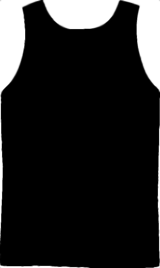

In [998]:
image_path = choice(list(IMAGE_SUBDIRS))
mask = Image.open(image_path / "mask.png")
im_gray = ImageOps.grayscale(mask)
display_scaled(im_gray)


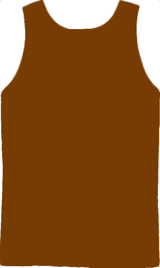

In [999]:
# colorize the jersey with our chosen name's "background" color
im_color = ImageOps.colorize(im_gray, bg_color, "white")
display_scaled(im_color)


In [1000]:
max_width = im_color.width * 0.6
draw = ImageDraw.Draw(im_color)


In [1001]:
def text_wrap(text, font, max_width):
    # From https://fiveminutes.today/articles/putting-text-on-images-with-python-pil/
    lines = []
    # If the width of the text is smaller than image width
    # we don't need to split it, just add it to the lines array
    # and return
    if font.getlength(text) <= max_width:
        lines.append(text)
    else:
        # split the line by spaces to get words
        words = text.split(" ")
        i = 0
        # append every word to a line while its width is shorter than image width
        while i < len(words):
            line = ""
            while i < len(words) and font.getlength(line + words[i]) <= max_width:
                line = line + words[i] + " "
                i += 1
            if not line:
                line = words[i]
                i += 1
            # when the line gets longer than the max width do not append the word,
            # add the line to the lines array
            lines.append(line.strip())
    return lines


In [1002]:
name_font = ImageFont.truetype(BytesIO(font_data), 200)


In [1003]:
# get size of name in our chosen font
name_width = draw.textlength(name, font=name_font)


In [1004]:
# break up name into multiple lines if necessary to fit on shirt
lines = text_wrap(name, name_font, max_width)
lines


['Salty', 'Skoolyard']

In [1005]:
longest_line = max(lines, key=len)
longest_line_width = draw.textlength(longest_line, font=name_font)

In [1006]:
while longest_line_width > max_width:
    name_font = ImageFont.truetype(BytesIO(font_data), name_font.size - 1)
    longest_line_width = draw.textlength(longest_line, font=name_font)

In [1007]:
# start to place name on shirt image - with current template, starting 20% down from top works well
start_y = (im_color.height - name_height) * 0.3
y = start_y


In [1008]:
for line in lines:
    # add each line of name text to the image, centered
    line_width = draw.textlength(line, font=name_font)
    draw.text(
        ((im_color.width - line_width) / 2, y),
        line,
        fill=fg_color,
        font=name_font,
    )
    y += line_height


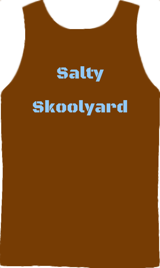

In [1009]:
display_scaled(im_color)

In [1010]:
NUMBER_FONT_SIZE = 200


In [1011]:
number_font = ImageFont.truetype(BytesIO(font_data), NUMBER_FONT_SIZE)


In [1012]:
number_width = draw.textlength(str(number), font=number_font)


In [1013]:
while number_width > max_width:
    NUMBER_FONT_SIZE = NUMBER_FONT_SIZE - 10
    number_font = ImageFont.truetype(BytesIO(font_data), NUMBER_FONT_SIZE)
    number_width = draw.textlength(number, font=number_font)


In [1014]:
# once number text will fit on shirt, add it to the image
draw.text(
    ((im_color.width - number_width) / 2, y), number, fill=fg_color, font=number_font
)


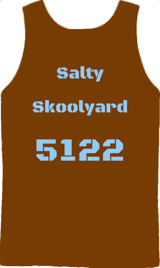

In [1015]:
display_scaled(im_color)

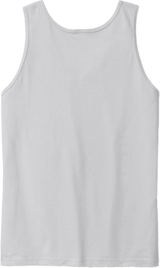

In [1016]:
im_overlay = Image.open(image_path / "overlay.png")
display_scaled(im_overlay)

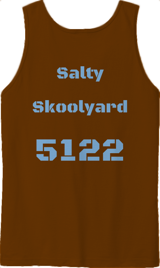

In [1017]:
im_final = ImageChops.multiply(im_color, im_overlay)
display_scaled(im_final)